# Exercise 0.1

In [2]:
import pandas as pd
df = pd.read_csv("data/Steam Top 100 Played Games - List.csv")
df.head()

,Rank,Name,Thumbnail URL,Store Link,Price,Current Players,Peak Today,Genre Tags
0,1,Counter-Strike 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/730/Counter...,Free To Play,"1,485,535","1,489,929","FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,PUBG: BATTLEGROUNDS,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/578080/PUBG...,Free To Play,"765,150","765,150","Survival, Shooter, Battle Royale, Multiplayer,..."
2,3,Dota 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/570/Dota_2?...,Free To Play,"698,757","715,295","Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,Marvel Rivals,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2767030/Mar...,Free To Play,"312,427","565,653","Free to Play, Multiplayer, Hero Shooter, Third..."
4,5,Path of Exile 2,https://shared.cloudflare.steamstatic.com//sto...,https://store.steampowered.com/app/2694490/Pat...,£23.93,"258,475","288,757","Action RPG, Hack and Slash, RPG, Action, Souls..."


In [3]:
df.shape

(100, 8)

In [4]:
df.columns

Index(['Rank', 'Name', 'Thumbnail URL', 'Store Link', 'Price',
       'Current Players', 'Peak Today', 'Genre Tags'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    object
 6   Peak Today       100 non-null    object
 7   Genre Tags       100 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.4+ KB


In [32]:
#df["Current Players"] = df["Current Players"].str.replace(",","").astype(int)
#df["Peak Today"] = df["Peak Today"].str.replace(",","").astype(int)
df["Price"] = df["Price"].str.replace("Free To Play","0")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Rank             100 non-null    int64 
 1   Name             100 non-null    object
 2   Thumbnail URL    100 non-null    object
 3   Store Link       100 non-null    object
 4   Price            100 non-null    object
 5   Current Players  100 non-null    int64 
 6   Peak Today       100 non-null    int64 
 7   Genre Tags       100 non-null    object
dtypes: int64(3), object(5)
memory usage: 6.4+ KB


In [39]:
#df["Price"] = df["Price"].str.replace("£","").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             100 non-null    int64  
 1   Name             100 non-null    object 
 2   Thumbnail URL    100 non-null    object 
 3   Store Link       100 non-null    object 
 4   Price            100 non-null    float64
 5   Current Players  100 non-null    int64  
 6   Peak Today       100 non-null    int64  
 7   Genre Tags       100 non-null    object 
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [98]:
import duckdb
games_top_10 = duckdb.query(
    """--sql
    SELECT name as Game, "peak today" as Players, price
    from df
    ORDER BY Players DESC
"""
).df().head(10).set_index("Game")
games_top_10

,Players,Price
Game,,
Counter-Strike 2,1489929,0.00
PUBG: BATTLEGROUNDS,765150,0.00
Dota 2,715295,0.00
Marvel Rivals,565653,0.00
Path of Exile 2,288757,23.93
NARAKA: BLADEPOINT,208643,0.00
Grand Theft Auto V,207117,14.80
Rust,205358,34.99
Palworld,165613,24.99


Text(-0.2, 3, 'no bars -> free to play')

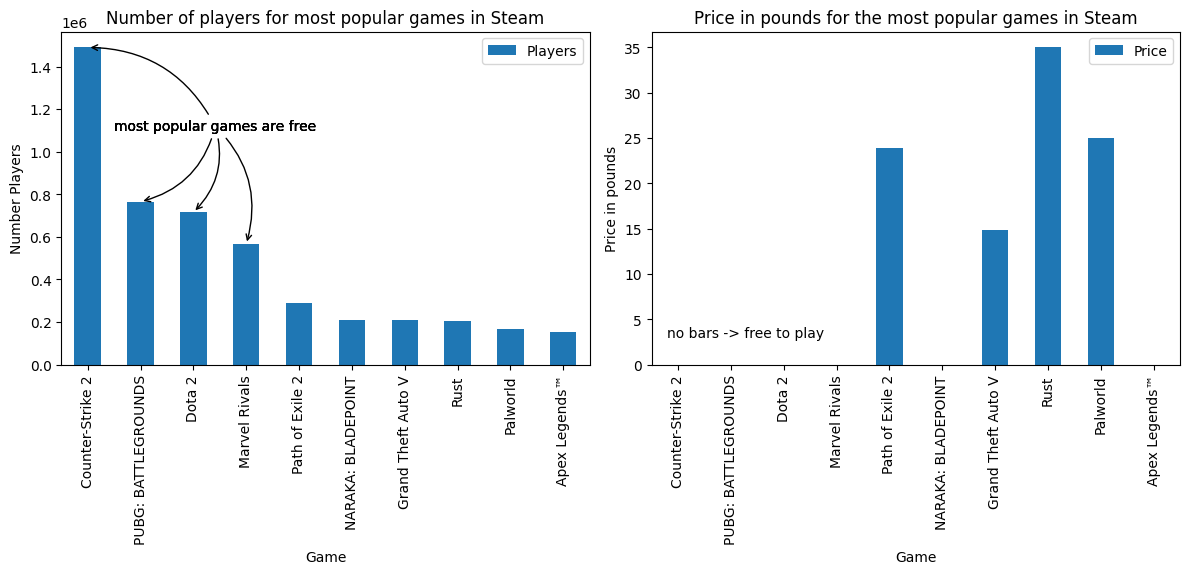

In [195]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1,2, figsize= (12,6))
games_top_10.plot(kind="bar", y= "Players", ax=ax1)
games_top_10.plot(kind="bar", y= "Price", ax=ax2)
ax1.set(title="Number of players for most popular games in Steam", ylabel="Number Players", xlabel="Game")
ax2.set(title="Price in pounds for the most popular games in Steam", ylabel="Price in pounds", xlabel="Game")
fig.tight_layout()
containers = [0,1,2,3]

for container in containers:
        xy = (ax1.containers[0][container].get_x()+0.25, ax1.containers[0][container].get_height())
        rad = 0.3 if xy[0] < 0.25 else -0.3
        arrowprops = dict(arrowstyle = "->", linewidth = 1, connectionstyle = f"arc3, rad={rad}")
        ax1.annotate(
        text = "most popular games are free", 
        arrowprops= arrowprops, 
        xy=xy, 
        xytext=(0.5, 1100000))
#ax.annotate(text = "Swedes", xy= (1, 32), arrowprops=arrowprops, xytext = (.8, 40))
##ax.annotate(text = "Germans", xy= (0, 12), arrowprops=arrowprops, xytext = (0, 20))
#a.annotate(text = "The rest", xy= (0, 55), arrowprops=arrowprops, xytext = (0, 45))
ax2.annotate(text = "no bars -> free to play", xy=(-0.2, 3))


In [312]:
top_10_genres = duckdb.query(
    """--sql
    SELECT "Genre tags" as Genre, "peak today" as Players
    from df
    ORDER BY Players DESC
"""
).df().head(10)
top_10_genres

,Genre,Players
0,"FPS, Shooter, Multiplayer, Competitive, Action...",1489929
1,"Survival, Shooter, Battle Royale, Multiplayer,...",765150
2,"Free to Play, MOBA, Multiplayer, Strategy, eSp...",715295
3,"Free to Play, Multiplayer, Hero Shooter, Third...",565653
4,"Action RPG, Hack and Slash, RPG, Action, Souls...",288757
5,"Battle Royale, Multiplayer, Martial Arts, PvP,...",208643
6,"Open World, Action, Multiplayer, Crime, Mature",207117
7,"Survival, Crafting, Multiplayer, Open World, O...",205358
8,"Open World, Survival, Creature Collector, Mult...",165613
9,"Free to Play, Battle Royale, Multiplayer, FPS,...",151447


In [313]:
top_10_genres["Genre"] = top_10_genres["Genre"].str.split(",")
top_10_genres

,Genre,Players
0,"[FPS, Shooter, Multiplayer, Competitive, A...",1489929
1,"[Survival, Shooter, Battle Royale, Multipla...",765150
2,"[Free to Play, MOBA, Multiplayer, Strategy,...",715295
3,"[Free to Play, Multiplayer, Hero Shooter, T...",565653
4,"[Action RPG, Hack and Slash, RPG, Action, ...",288757
5,"[Battle Royale, Multiplayer, Martial Arts, ...",208643
6,"[Open World, Action, Multiplayer, Crime, M...",207117
7,"[Survival, Crafting, Multiplayer, Open Worl...",205358
8,"[Open World, Survival, Creature Collector, ...",165613
9,"[Free to Play, Battle Royale, Multiplayer, ...",151447


In [318]:
hej= top_10_genres["Genre"].explode("Genre")
hej

0               FPS
1           Shooter
2       Multiplayer
3       Competitive
4            Action
           ...     
189           Funny
190       Lore-Rich
191       Cyberpunk
192       Cinematic
193               +
Name: Genre, Length: 194, dtype: object

In [321]:
hej.value_counts()

Genre
Multiplayer             10
Action                  10
+                        9
PvP                      7
Co-op                    7
                        ..
MMORPG                   1
Horror                   1
Inventory Management     1
Dark                     1
Cinematic                1
Name: count, Length: 86, dtype: int64

In [307]:
df_action = df_all_genres['Genre'].str.lower()
df_action.sort_values()


193               +
151               +
104               +
62                +
20                +
           ...     
173    free to play
152      open world
126      open world
131        survival
21         survival
Name: Genre, Length: 194, dtype: object

In [306]:
df_action_filtered = df_action[df_action == 'action']
df_action_filtered


Series([], Name: Genre, dtype: object)

In [266]:
all_genres.groupby(["Genre"]).sum().sort_values("Players", ascending=False).head(10)

,Players
Genre,
Action,4762962
Multiplayer,4762962
+,4555845
PvP,4101475
Co-op,4058445
Online Co-Op,4030142
Team-Based,3687474
Competitive,3536027
Strategy,3536027
